In [5]:
import numpy as np
import matplotlib.pyplot as plt
import opensimplex
import functools

In [4]:
def generate_world(world, player, player_init_pose=None):
    simplex = opensimplex.OpenSimplex(seed=world.random.randint(0, 2 ** 31 - 1))
    tunnels = np.zeros(world.area, np.bool)
    if player_init_pose:
        player_pos = player_init_pose
    else:
        player_pos = player.pos
    for x in range(world.area[0]):
        for y in range(world.area[1]):
            _set_material(world, (x, y), player_pos, tunnels, simplex)
    for x in range(world.area[0]):
        for y in range(world.area[1]):
            _set_object(world, (x, y), player_pos, tunnels)


def _set_material(world, pos, player_pos, tunnels, simplex):
    x, y = pos
    simplex = functools.partial(_simplex, simplex)
    uniform = world.random.uniform
    start = 4 - np.sqrt((x - player_pos[0]) ** 2 + (y - player_pos[1]) ** 2)
    start += 2 * simplex(x, y, 8, 3)
    start = 1 / (1 + np.exp(-start))
    water = simplex(x, y, 3, {15: 1, 5: 0.15}, False) + 0.1
    water -= 2 * start
    mountain = simplex(x, y, 0, {15: 1, 5: 0.3})
    mountain -= 4 * start + 0.3 * water
    # original setting
    coal_uni_thr = 0.85
    iron_uni_thr = 0.75
    iron_simplex_thr = 0.4

    if start > 0.2:
        world[x, y] = "grass"
    elif mountain > 0.15:
        if simplex(x, y, 6, 7) > 0.15 and mountain > 0.3:  # cave
            world[x, y] = "path"
        elif simplex(2 * x, y / 5, 7, 3) > 0.4:  # horizonal tunnle
            world[x, y] = "path"
            tunnels[x, y] = True
        elif simplex(x / 5, 2 * y, 7, 3) > 0.4:  # vertical tunnle
            world[x, y] = "path"
            tunnels[x, y] = True
        elif simplex(x, y, 1, 8) > 0 and uniform() > coal_uni_thr:
            world[x, y] = "coal"
        elif simplex(x, y, 2, 6) > iron_simplex_thr and uniform() > iron_uni_thr:
            world[x, y] = "iron"
        elif mountain > 0.18 and uniform() > 0.994:
            world[x, y] = "diamond"
        elif mountain > 0.3 and simplex(x, y, 6, 5) > 0.35:
            world[x, y] = "lava"
        else:
            world[x, y] = "stone"
    elif 0.65 < water <= 0.75 and simplex(x, y, 4, 9) > -0.2:
        world[x, y] = "sand"
    elif 0.8 < water:
        world[x, y] = "water"
    else:  # grassland
        if simplex(x, y, 5, 7) > 0 and uniform() > 0.8:
            world[x, y] = "tree"
        else:
            world[x, y] = "grass"


def _set_object(world, pos, player_pos, tunnels):
    x, y = pos
    uniform = world.random.uniform
    dist = np.sqrt((x - player_pos[0]) ** 2 + (y - player_pos[1]) ** 2)
    material, _ = world[x, y]
    if material not in constants.walkable:
        pass
    # elif dist > 3 and material == "grass" and uniform() > 0.985:
    #     world.add(objects.Cow(world, (x, y)))
    # elif dist > 10 and uniform() > 0.993:
    #     if world.level in [4]:
    #         world.add(objects.Zombie(world, (x, y), player))
    # elif material == "path" and tunnels[x, y] and uniform() > 0.95:
    #     if world.level in [4]:
    #         world.add(objects.Skeleton(world, (x, y), player))


def _simplex(simplex, x, y, z, sizes, normalize=True):
    if not isinstance(sizes, dict):
        sizes = {sizes: 1}
    value = 0
    for size, weight in sizes.items():
        if hasattr(simplex, "noise3d"):
            noise = simplex.noise3d(x / size, y / size, z)
        else:
            noise = simplex.noise3(x / size, y / size, z)
        value += weight * noise
    if normalize:
        value /= sum(sizes.values())
    return value


Text(0.5, 1.0, 'iron simplex')

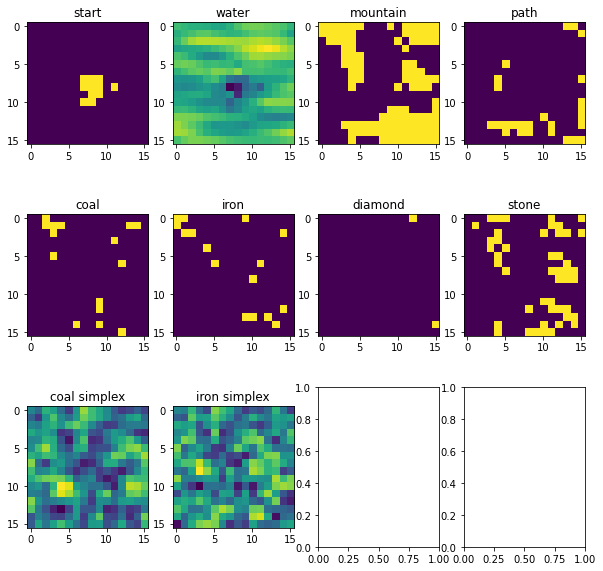

In [159]:
def _set_material(world, pos, player_pos, tunnels, simplex):
    start_noise, water_noise, mountain_noise, path, coal, iron, diamond, stone, coal_simplex, iron_simplex = world
    x, y = pos
    simplex = functools.partial(_simplex, simplex)
    start = 0.5 - np.sqrt((x - player_pos[0]) ** 2 + (y - player_pos[1]) ** 2)
    start += 2 * simplex(x, y, 8, 3/4)
    start = 1 / (1 + np.exp(-start))
    
    start_noise[x, y] = start
    water = simplex(2*x, y/2, 3, {15/4: 1, 5/4: 0.15}, False) + 0.1
    water -= 2 * start
    water_noise[x, y] = water
    mountain = simplex(x, y, 0, {15/4: 1, 5/4: 0.3})
    mountain -= 4 * start + 0.3 * water
    mountain_noise[x, y] = mountain

    coal_uni_thr = 0.4
    iron_uni_thr = 0.4
    iron_simplex_thr = 0.15
    diamond_uni_thr = 0.9
    coal_simplex[x,y] = simplex(x, y, 1, 8/4)
    iron_simplex[x,y] = simplex(x, y, 1, 6/4)
    if start > 0.2:
        pass
    elif mountain > 0.0:
        if simplex(x, y, 6, 7/4) > 0.15 and mountain > 0.3:  # cave
            path[x, y] = 1
        elif simplex(2 * x, y / 5, 7, 3/4) > 0.4:  # horizonal tunnle
            path[x, y] = 1
        elif simplex(x / 5, 2 * y, 7, 3/4) > 0.4:  # vertical tunnle
            path[x, y] = 1
        elif simplex(x, y, 1, 8/4) > 0 and np.random.uniform() > coal_uni_thr:
            coal[x, y] = 1
        elif simplex(x, y, 2, 6/4) > iron_simplex_thr and np.random.uniform() > iron_uni_thr:
            iron[x, y] = 1
        elif mountain > 0.18 and np.random.uniform() > diamond_uni_thr:
            diamond[x, y] = 1
        else:
            stone[x, y] = 1
    
start = np.zeros((16, 16))
water = np.zeros((16, 16))
mountain = np.zeros((16, 16))
path = np.zeros((16, 16))
coal = np.zeros((16, 16))
iron = np.zeros((16, 16))
diamond = np.zeros((16, 16))
stone = np.zeros((16, 16))
coal_simplex = np.zeros((16, 16))
iron_simplex = np.zeros((16, 16))
simplex = opensimplex.OpenSimplex(seed=1)
for x in range(start.shape[0]):
    for y in range(start.shape[1]):
        _set_material((start, water, mountain, path, coal, iron, diamond, stone, coal_simplex, iron_simplex), (x, y), (8, 8), 0, simplex)

fig, axes = plt.subplots(nrows=3, ncols=4)
fig.set_figheight(10)
fig.set_figwidth(10)
axes[0,0].imshow(start > 0.2)
axes[0,0].set_title("start")
axes[0,1].imshow(water)
axes[0,1].set_title("water")
axes[0,2].imshow(mountain > 0)
axes[0,2].set_title("mountain")
axes[0,3].imshow(path)
axes[0,3].set_title("path")
axes[1,0].imshow(coal)
axes[1,0].set_title("coal")
axes[1,1].imshow(iron)
axes[1,1].set_title("iron")
axes[1,2].imshow(diamond)
axes[1,2].set_title("diamond")
axes[1,3].imshow(stone)
axes[1,3].set_title("stone")
axes[2,0].imshow(coal_simplex)
axes[2,0].set_title("coal simplex")
axes[2,1].imshow(iron_simplex)
axes[2,1].set_title("iron simplex")

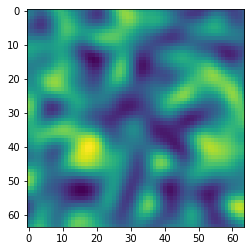

In [135]:
def _set_start(world, pos, player_pos, tunnels, simplex):
    x, y = pos
    simplex = functools.partial(_simplex, simplex)
    world[x,y] = simplex(x, y, 1, 8)
    
    
world = np.zeros((64, 64))
for x in range(world.shape[0]):
    for y in range(world.shape[1]):
        _set_start(world, (x, y), (32, 32), 0, simplex)

plt.imshow(world)